# TimeSeries prediction models comparison

In [1]:
import matplotlib.pyplot as plt

from utils import HORIZONS, read_results

In [2]:
df = read_results()
df.head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
0,5.828345,0.007688,0.087683,0.065175,NaiveSeasonal,1,electricity,1717209184.225114,{'K': 1}
1,3.092076,0.90624,0.951967,0.679575,NaiveSeasonal,1,weather,1717294686.590629,{'K': 1}
2,3.7561,1.193095,1.092289,0.824286,ARIMA,3,weather,1717296040.532335,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
3,4.196156,1.609963,1.268843,0.926357,NaiveSeasonal,10,weather,1717294689.658464,{'K': 1}
4,5.55441,0.006888,0.082992,0.061289,ARIMA,1,electricity,1716948572.772433,"{'p': 5, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
5,3.466243,1.02511,1.012477,0.763295,ARIMA,2,weather,1717296004.301837,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
6,3.992147,1.351339,1.162471,0.880481,ARIMA,10,weather,1717296186.053925,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
7,3.11931,0.788228,0.887822,0.687347,XGBModel,1,weather,1717294875.510436,"{'lags': 168, 'lags_past_covariates': None, 'l..."
8,22.03741,0.081273,0.285084,0.229601,XGBModel,7,electricity,1717294237.631734,"{'lags': 168, 'lags_past_covariates': None, 'l..."
9,3.937749,1.360446,1.166382,0.868172,ARIMA,9,weather,1717296150.33138,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."


## Model comparison

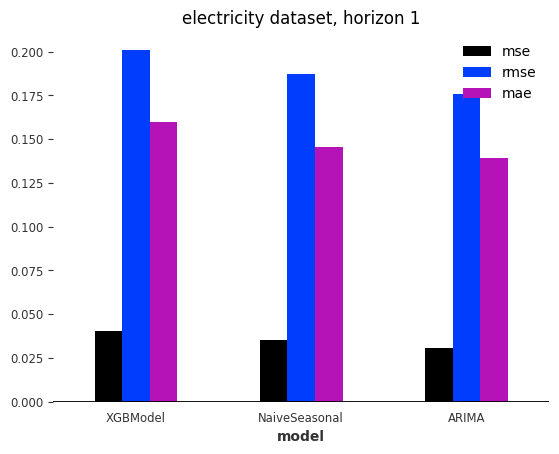

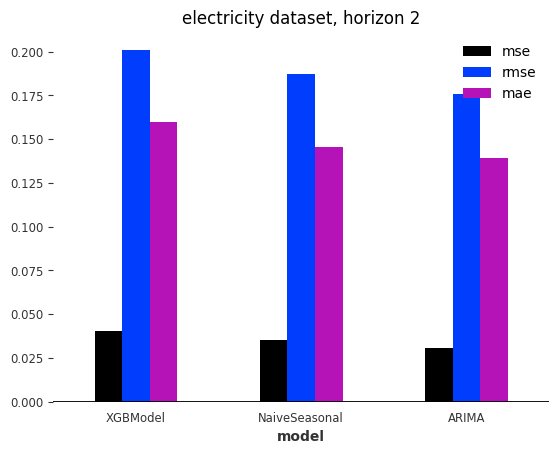

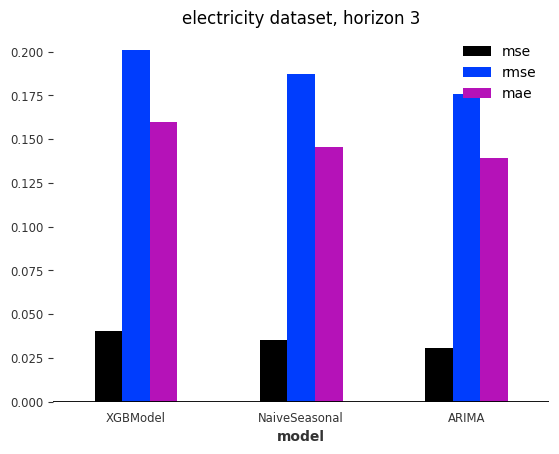

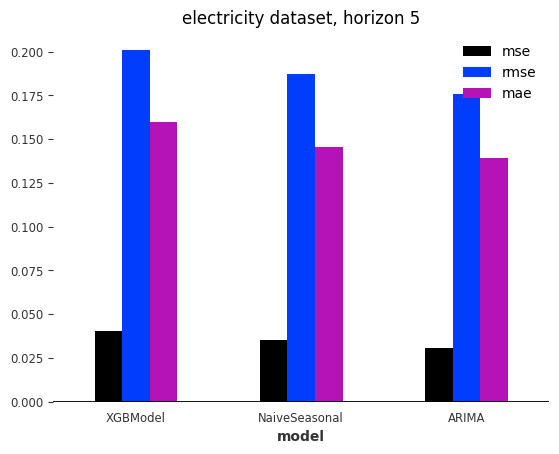

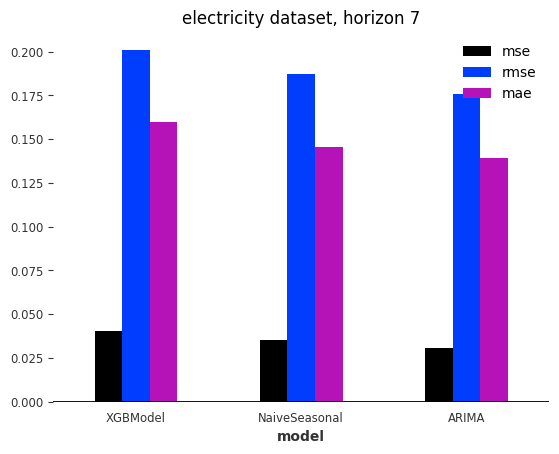

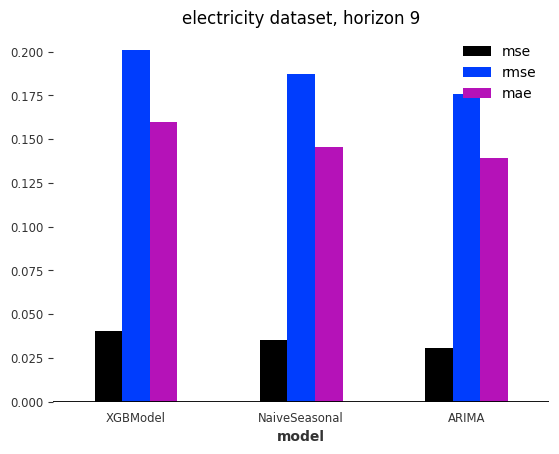

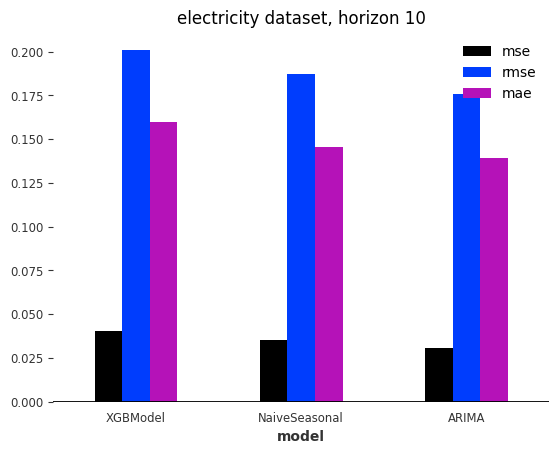

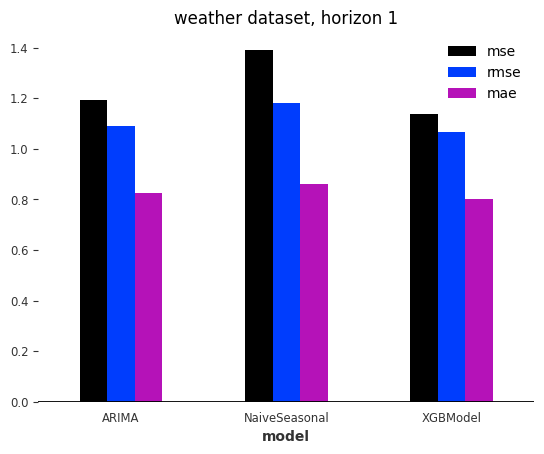

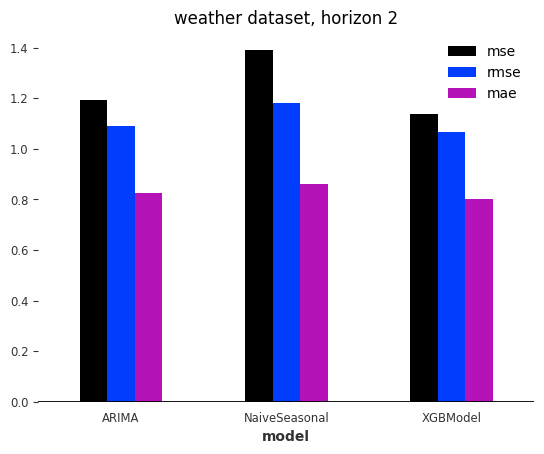

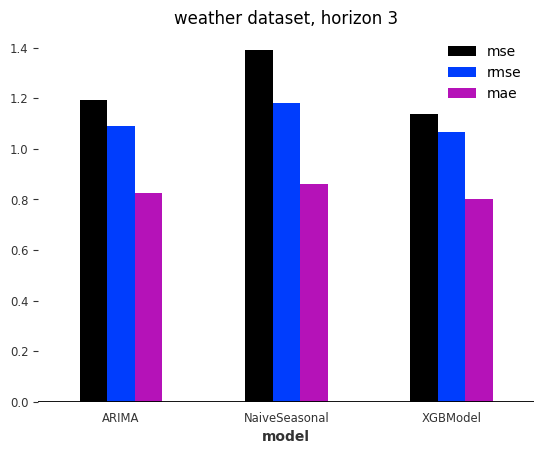

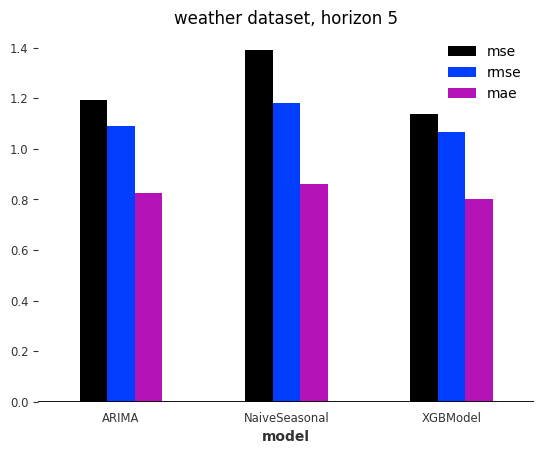

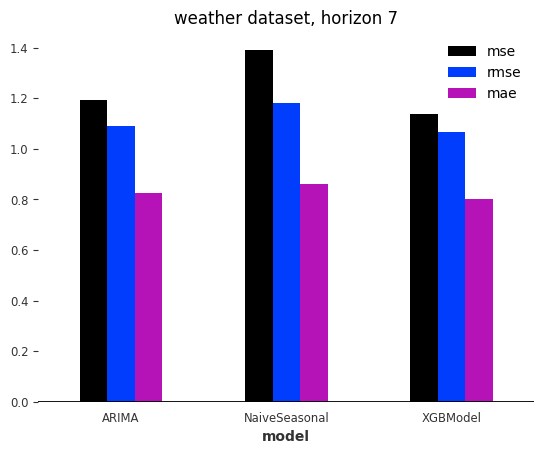

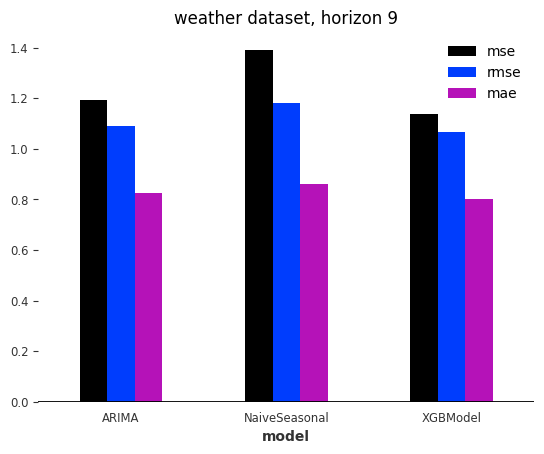

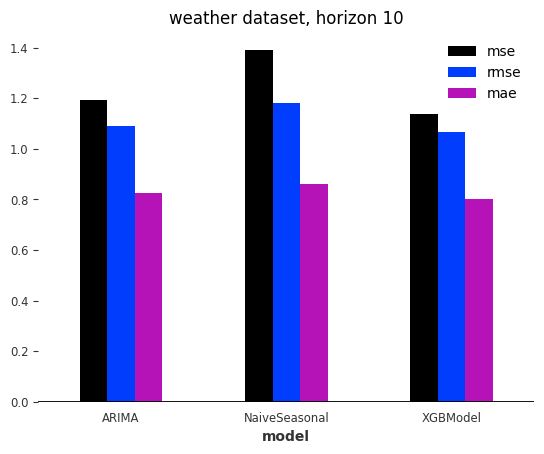

In [3]:
# take unique valeus from dataset column
datesets = df["dataset"].unique()

for dataset in datesets:
    for horizon in HORIZONS:
        df_walmart = df[df["dataset"] == dataset]
        df_walmart = df_walmart[df_walmart["forecast_horizon"] == 3]
        df_walmart.plot(x="model", y=["mse", "rmse", "mae"], kind="bar")

        plt.title(f"{dataset} dataset, horizon {horizon}")
        plt.xticks(rotation=0)
        plt.grid(False)
        plt.axhline(y=0, color="k")
        plt.show()

In [4]:
df.where(df["dataset"] == "weather").dropna().sort_values("forecast_horizon").head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
1,3.092076,0.90624,0.951967,0.679575,NaiveSeasonal,1,weather,1717294686.590629,{'K': 1}
28,3.036386,0.780147,0.883259,0.66798,ARIMA,1,weather,1717295967.11855,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
7,3.11931,0.788228,0.887822,0.687347,XGBModel,1,weather,1717294875.510436,"{'lags': 168, 'lags_past_covariates': None, 'l..."
30,3.367057,0.968722,0.984237,0.747791,XGBModel,2,weather,1717294940.825768,"{'lags': 168, 'lags_past_covariates': None, 'l..."
5,3.466243,1.02511,1.012477,0.763295,ARIMA,2,weather,1717296004.301837,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
38,3.606925,1.209905,1.099957,0.795282,NaiveSeasonal,2,weather,1717294687.088488,{'K': 1}
29,3.918952,1.392067,1.179859,0.860666,NaiveSeasonal,3,weather,1717294687.611872,{'K': 1}
39,3.622524,1.1387,1.067099,0.802909,XGBModel,3,weather,1717295012.220981,"{'lags': 168, 'lags_past_covariates': None, 'l..."
2,3.7561,1.193095,1.092289,0.824286,ARIMA,3,weather,1717296040.532335,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
12,4.104371,1.344314,1.159446,0.901242,ARIMA,5,weather,1717296077.253076,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."


## Time horizons

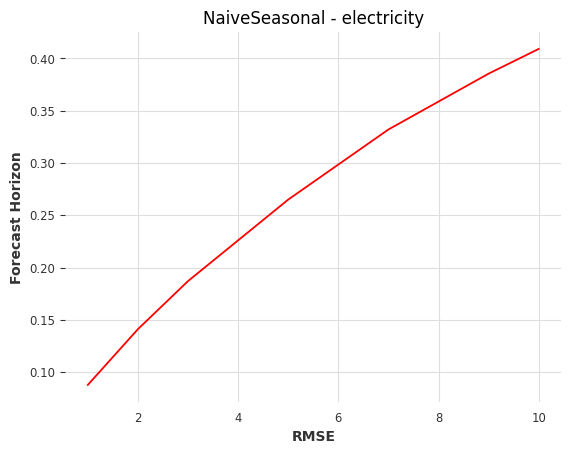

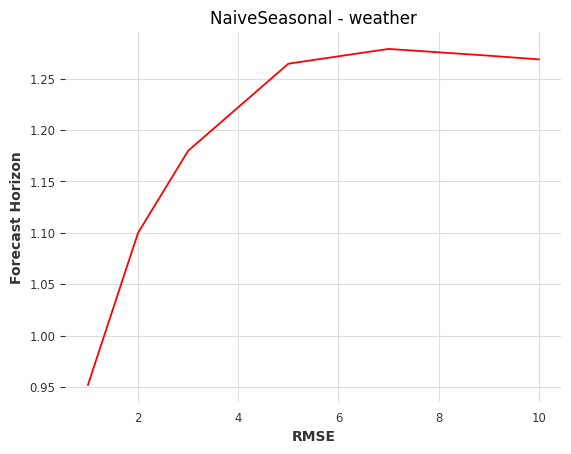

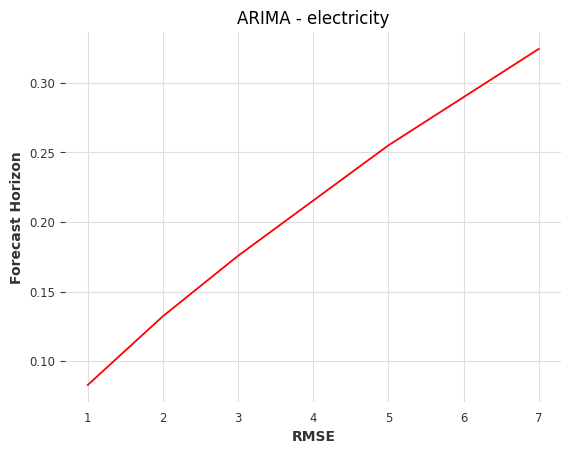

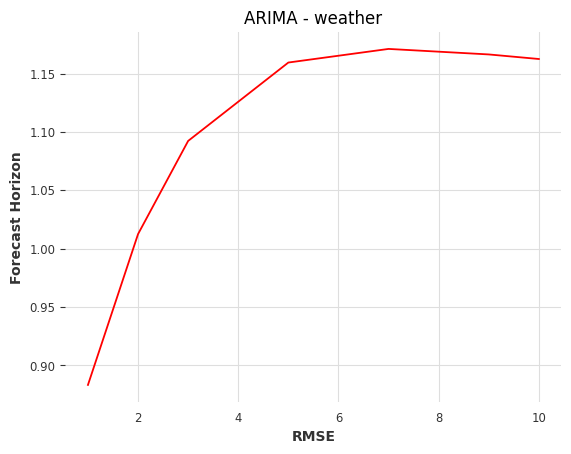

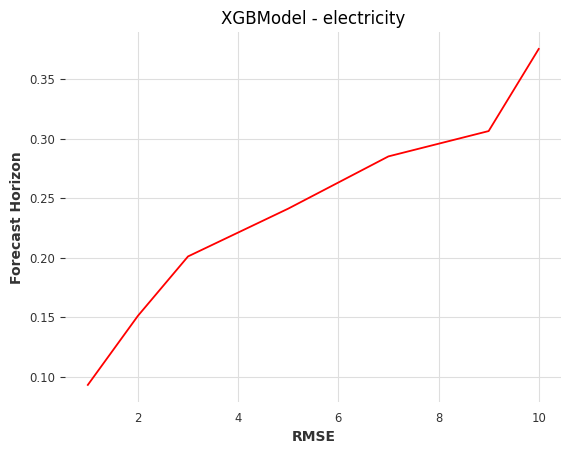

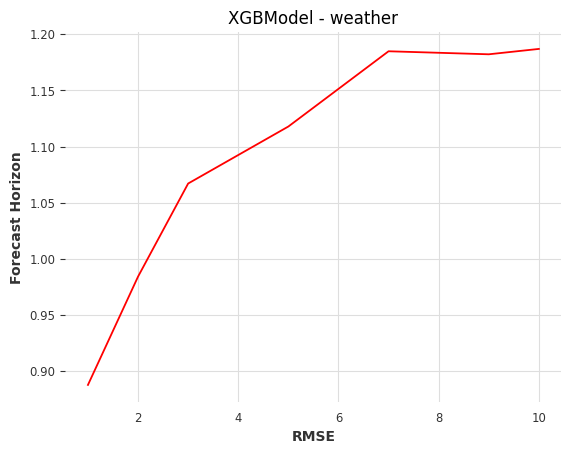

In [51]:
datasets = df["dataset"].unique()
models = df["model"].unique()
horizons = df["forecast_horizon"].unique()

for model in models:
    for dataset in datasets:
        df_subset = df[(df["dataset"] == dataset) & (df["model"] == model)].sort_values("forecast_horizon")
        plt.plot(df_subset["forecast_horizon"], df_subset["rmse"], color="red")
        plt.ylabel("Forecast Horizon")
        plt.xlabel("RMSE")
        plt.title(f"{model} - {dataset}")
        plt.savefig(f"results/horizon-plots/{model}-{dataset}.png")
        plt.show()


### Walmart-sales

In [5]:
df_walmart = df[df["dataset"] == "walmart-sales"]

df_walmart.plot(x="model", y=["mse", "rmse", "mae"], kind="bar")

TypeError: no numeric data to plot